In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl as ql 
import talib as ta

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
skipped_rows = range(1,1700000)

In [3]:
data_init = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv', skiprows=skipped_rows, encoding="utf-8-sig")
list(data_init)

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

In [4]:
timestamp_list = data_init['Timestamp']
weighted_data = data_init['Weighted_Price']
vol_data = data_init['Volume_(Currency)']

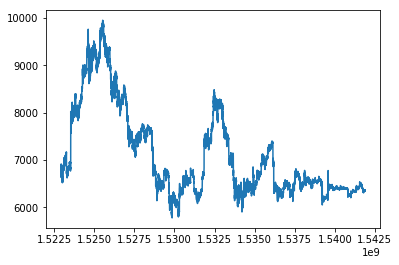

In [6]:
plt.plot(timestamp_list, weighted_data)

<function matplotlib.pyplot.show(*args, **kw)>

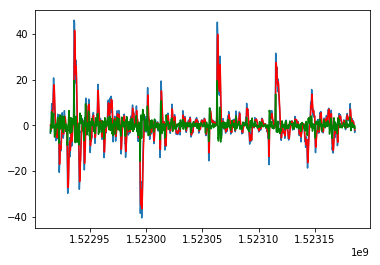

In [19]:
macd, macdsignal, macdhist = ta.MACD(weighted_data, fastperiod=12, slowperiod=26, signalperiod=9)
plt.plot(timestamp_list, macd)
plt.plot(timestamp_list, macdsignal, color='red')
plt.plot(timestamp_list, macdhist, color='green')
plt.show

In [ ]:
WMA = ta.WMA(weighted_data, timeperiod=30)
IND = pd.DataFrame(timestamp_list, WMA, macd)

plt.plot(IND)
plt.show()

In [21]:
train_IND, test_IND, train_price, test_price = train_test_split(IND, weighted_data, test_size = 0.25, random_state = 42)
print('Training IND Shape:', train_IND.shape)
print('Training Price Shape:', train_price.shape)
print('Testing IND Shape:', test_IND.shape)
print('Testing Price Shape:', test_price.shape)


Training IND Shape: (237266, 1)
Training Price Shape: (237266,)
Testing IND Shape: (79089, 1)
Testing Price Shape: (79089,)


In [22]:
baseline_preds = test_price
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_price)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.0


In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(train_price, train_IND)
model.score(test_price, test_IND)

ValueError: Expected 2D array, got 1D array instead:
array=[6450.2887795 7400.2621953 6758.5894731 ... 6483.3475047 6360.5227609
 5876.5052756].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.